In [1]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [4]:
def get_font_family():

    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

plt.style.use("seaborn")
plt.rc("font", family = get_font_family())
plt.rc("axes", unicode_minus = False)

%config InlineBackend.figure_format = 'retuna'

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

ERROR:root:supported formats are: 'pdf','jpeg','png2x','svg','jpg','png','retina' not 'retuna'


In [5]:
plt.style.use("seaborn")
plt.rc("font", family = get_font_family())

plt.rc("axes", unicode_minus = False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

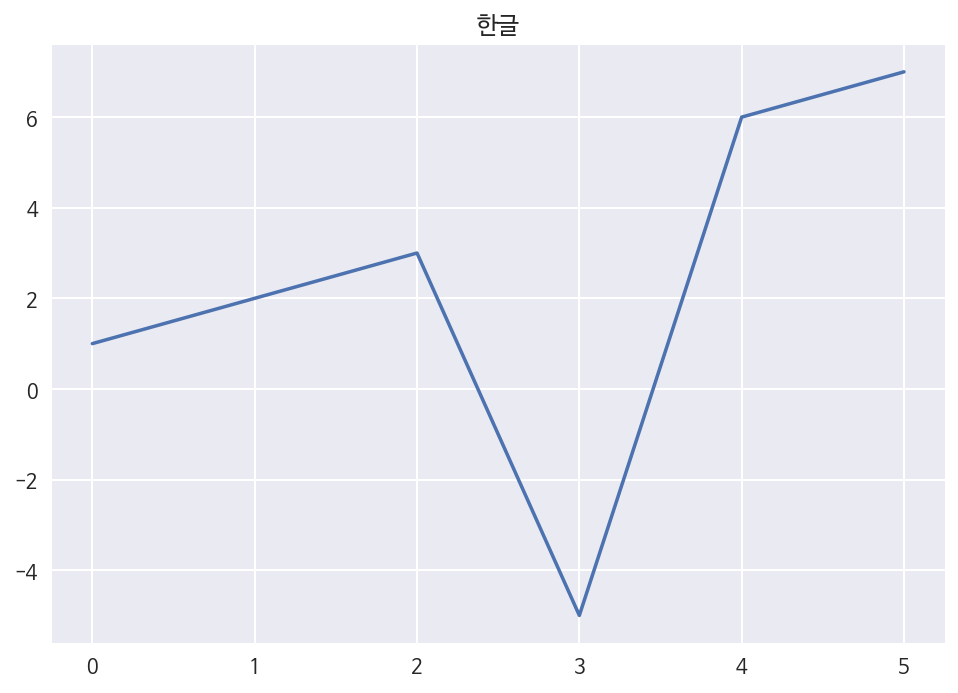

In [6]:
pd.Series([1,2,3,-5,6,7]).plot(title = "한글")

In [7]:
customers = pd.read_csv("gdrive/My Drive/data/olist_customers_dataset.csv")
geolocation = pd.read_csv("gdrive/My Drive/data/olist_geolocation_dataset.csv")
items = pd.read_csv("gdrive/My Drive/data/olist_order_items_dataset.csv")
payments = pd.read_csv("gdrive/My Drive/data/olist_order_payments_dataset.csv")
reviews = pd.read_csv("gdrive/My Drive/data/olist_order_reviews_dataset.csv")
orders = pd.read_csv("gdrive/My Drive/data/olist_orders_dataset.csv")
products = pd.read_csv("gdrive/My Drive/data/olist_products_dataset.csv")
sellers = pd.read_csv("gdrive/My Drive/data/olist_sellers_dataset.csv")
category_name = pd.read_csv("gdrive/My Drive/data/product_category_name_translation.csv")

In [8]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
reviews.shape

(99224, 7)

In [10]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [14]:
items.shape , payments.shape

((112650, 7), (103886, 5))

In [15]:
payment_total = pd.merge(payments,items, how = 'outer',on = 'order_id')
payment_total.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8.0,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1.0,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1.0,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8.0,107.78,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1.0,credit_card,2.0,128.45,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88


In [16]:
payment_total.shape

(118434, 11)

In [17]:
products.shape, category_name.shape

((32951, 9), (71, 2))

In [18]:
category_name_total = pd.merge(products,category_name, how = 'outer',on = 'product_category_name')
category_name_total.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [19]:
category_name_total.shape

(32951, 10)

In [20]:
total = pd.merge(payment_total,category_name_total, how = 'outer',on = 'product_id')
total.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8.0,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
1,d86305c284cecff56c7ee9d3fbd4f8d6,1.0,credit_card,4.0,93.72,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,13.92,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
2,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1.0,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,auto
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1.0,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,perfumery
4,1966886b80f14d0588adf6406afb0026,1.0,debit_card,1.0,68.89,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-09-01 16:06:59,56.99,11.90,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,perfumery


In [21]:
total.shape

(118434, 20)

In [22]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [23]:
total = total.join(geolocation,how = 'left')

In [24]:
total.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8.0,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,...,800.0,17.0,27.0,17.0,home_construction,1037,-23.545621,-46.639292,sao paulo,SP
1,d86305c284cecff56c7ee9d3fbd4f8d6,1.0,credit_card,4.0,93.72,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,...,800.0,17.0,27.0,17.0,home_construction,1046,-23.546081,-46.644820,sao paulo,SP
2,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1.0,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,...,150.0,16.0,6.0,11.0,auto,1046,-23.546129,-46.642951,sao paulo,SP
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1.0,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,...,250.0,20.0,8.0,21.0,perfumery,1041,-23.544392,-46.639499,sao paulo,SP
4,1966886b80f14d0588adf6406afb0026,1.0,debit_card,1.0,68.89,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-09-01 16:06:59,56.99,...,250.0,20.0,8.0,21.0,perfumery,1035,-23.541578,-46.641607,sao paulo,SP


In [25]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [26]:
total = total.join(customers,how = 'left')

In [27]:
total.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8.0,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,...,1037,-23.545621,-46.639292,sao paulo,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP
1,d86305c284cecff56c7ee9d3fbd4f8d6,1.0,credit_card,4.0,93.72,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,...,1046,-23.546081,-46.644820,sao paulo,SP,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP
2,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1.0,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,...,1046,-23.546129,-46.642951,sao paulo,SP,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1.0,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,...,1041,-23.544392,-46.639499,sao paulo,SP,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP
4,1966886b80f14d0588adf6406afb0026,1.0,debit_card,1.0,68.89,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-09-01 16:06:59,56.99,...,1035,-23.541578,-46.641607,sao paulo,SP,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP


In [28]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [29]:
total = pd.merge(total,sellers, how = 'outer',on = 'seller_id')

In [30]:
total.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,geolocation_city,geolocation_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8.0,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,...,sao paulo,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,13321.0,salto,SP
1,d86305c284cecff56c7ee9d3fbd4f8d6,1.0,credit_card,4.0,93.72,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,...,sao paulo,SP,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP,13321.0,salto,SP
2,5308fdab519f7478ef64894128fbbee4,1.0,credit_card,1.0,36.07,1.0,1b93af229a5768eaaed2064722b1c1dc,213b25e6f54661939f11710a6fddb871,2018-06-11 12:11:27,129.95,...,sao paulo,SP,eedca305aa0dd3345af3506d66090a10,e292235e98592549141195ffb566d456,46430.0,guanambi,BA,13321.0,salto,SP
3,5308fdab519f7478ef64894128fbbee4,2.0,voucher,1.0,112.67,1.0,1b93af229a5768eaaed2064722b1c1dc,213b25e6f54661939f11710a6fddb871,2018-06-11 12:11:27,129.95,...,são paulo,SP,dc4a4863832cad43ecf971aae07084de,7f93f9bdd0b2fa23530bb20ba14a207b,72270.0,brasilia,DF,13321.0,salto,SP
4,bb54e9bf4bdb6c6391a7c6b517748b9f,1.0,credit_card,2.0,124.92,1.0,71540d636652fc682032d3b3c0a180c1,213b25e6f54661939f11710a6fddb871,2018-06-04 11:50:16,113.85,...,sao paulo,SP,c51b1c9fa6b8be3870d14de83d563ec9,d9ff5ffe0e9e976de8b3b98a0306e5e3,17520.0,marilia,SP,13321.0,salto,SP


In [31]:
total = pd.merge(total,reviews, how = 'outer',on = 'order_id')

In [32]:
total = total.rename(columns = {'order_id':'주문ID','payment_sequential':'결제방법수','payment_type':'결제종류','payment_installments':'할부개월',
               'payment_value':'결제가격','order_item_id':'주문상품수','product_id':'상품ID','seller_id':'판매자ID','shipping_limit_date':'판매자배송제한날짜','price':'상품가격',
      'freight_value':'배송비','product_category_name':'상품카테고리명','product_category_name_english':'상품카테고리명(영문)','geolocation_zip_code_prefix':'우편번호','geolocation_lat':'위도','geolocation_lng':'경도',
                               'geolocation_city':'도시',"geolocation_state":'도시_주','seller_zip_code_prefix':'판매자우편번호','seller_city':'판매자_도시','seller_state':'판매자도시_주','customer_id':'고객ID','customer_zip_code_prefix':'고객우편번호',
                                'customer_city':'고객도시','customer_state':'고객도시_주','customer_unique_id':'고객고유식별번호','review_id':'댓글식별번호','review_score':'댓글점수','review_comment_title':'댓글제목','review_comment_message':'댓글내용',
                                'review_creation_date':'댓글작성시간','review_answer_timestamp':'댓글답변시간','product_name_lenght':'상품명길이','product_description_lenght':'설명서길이','product_photos_qty':'설명서이미지갯수','product_weight_g':'상품무게(g)',
                                'product_length_cm':'상품길이(cm)','product_height_cm':'상품높이(cm)','product_width_cm':'상품너비(cm)'
                               })

In [33]:
total.head()

,주문ID,결제방법수,결제종류,할부개월,결제가격,주문상품수,상품ID,판매자ID,판매자배송제한날짜,상품가격,...,고객도시_주,판매자우편번호,판매자_도시,판매자도시_주,댓글식별번호,댓글점수,댓글제목,댓글내용,댓글작성시간,댓글답변시간
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8.0,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,...,SP,13321.0,salto,SP,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,d86305c284cecff56c7ee9d3fbd4f8d6,1.0,credit_card,4.0,93.72,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,...,SP,13321.0,salto,SP,ec9d84039245b981ebdbf7d16c723b6e,4.0,NaN,NaN,2018-04-21 00:00:00,2018-04-21 10:31:10
2,5308fdab519f7478ef64894128fbbee4,1.0,credit_card,1.0,36.07,1.0,1b93af229a5768eaaed2064722b1c1dc,213b25e6f54661939f11710a6fddb871,2018-06-11 12:11:27,129.95,...,BA,13321.0,salto,SP,8c4799d2bd4f23b35cf959e0cd301b4d,5.0,Produto muito bom.,NaN,2018-06-21 00:00:00,2018-06-24 20:43:00
3,5308fdab519f7478ef64894128fbbee4,2.0,voucher,1.0,112.67,1.0,1b93af229a5768eaaed2064722b1c1dc,213b25e6f54661939f11710a6fddb871,2018-06-11 12:11:27,129.95,...,DF,13321.0,salto,SP,8c4799d2bd4f23b35cf959e0cd301b4d,5.0,Produto muito bom.,NaN,2018-06-21 00:00:00,2018-06-24 20:43:00
4,bb54e9bf4bdb6c6391a7c6b517748b9f,1.0,credit_card,2.0,124.92,1.0,71540d636652fc682032d3b3c0a180c1,213b25e6f54661939f11710a6fddb871,2018-06-04 11:50:16,113.85,...,SP,13321.0,salto,SP,74ee8b3ec46cf56eb0b1349ff526025a,3.0,NaN,NaN,2018-06-27 00:00:00,2018-06-30 16:09:07


In [34]:
total["댓글점수"]

0         1.0
1         4.0
2         5.0
3         5.0
4         3.0
         ... 
119138    5.0
119139    5.0
119140    3.0
119141    4.0
119142    4.0
Name: 댓글점수, Length: 119143, dtype: float64

In [35]:
total['상품카테고리명(영문)'].value_counts().sort_values(ascending= False)

bed_bath_table               11988
health_beauty                10032
sports_leisure                9004
furniture_decor               8832
computers_accessories         8150
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: 상품카테고리명(영문), Length: 71, dtype: int64

In [36]:
total.shape

(119143, 39)

In [37]:
total.isnull().sum()

주문ID                0
결제방법수               3
결제종류                3
할부개월                3
결제가격                3
주문상품수             833
상품ID              833
판매자ID             833
판매자배송제한날짜         833
상품가격              833
배송비               833
상품카테고리명          2542
상품명길이            2542
설명서길이            2542
설명서이미지갯수         2542
상품무게(g)           853
상품길이(cm)          853
상품높이(cm)          853
상품너비(cm)          853
상품카테고리명(영문)      2567
우편번호                0
위도                  0
경도                  0
도시                  0
도시_주                0
고객ID            19127
고객고유식별번호        19127
고객우편번호          19127
고객도시            19127
고객도시_주          19127
판매자우편번호           833
판매자_도시            833
판매자도시_주           833
댓글식별번호            997
댓글점수              997
댓글제목           105154
댓글내용            68898
댓글작성시간            997
댓글답변시간            997
dtype: int64

In [38]:
twice = pd.read_csv("gdrive/My Drive/data/twice.csv")
twice.head()

,고객ID,상품카테고리명_x,0
0,fc3d1daec319d62d49bfb5e1f83123e9,health_beauty,21
1,be1b70680b9f9694d8c70f41fa3dc92b,computers_accessories,20
2,bd5d39761aa56689a265d95d8d32b8be,auto,20
3,10de381f8a8d23fff822753305f71cae,furniture_decor,15
4,adb32467ecc74b53576d9d13a5a55891,garden_tools,15


In [39]:
twice.shape

(9132, 3)

In [40]:
total = pd.merge(twice,total, how = 'outer',on = '고객ID')
total.head()

,고객ID,상품카테고리명_x,0,주문ID,결제방법수,결제종류,할부개월,결제가격,주문상품수,상품ID,...,고객도시_주,판매자우편번호,판매자_도시,판매자도시_주,댓글식별번호,댓글점수,댓글제목,댓글내용,댓글작성시간,댓글답변시간
0,fc3d1daec319d62d49bfb5e1f83123e9,health_beauty,21.0,fc8088acbc3136f9baf41c1d43d2599d,1.0,credit_card,2.0,56.92,1.0,57f2de7e1c6028c7d38a50cff155c794,...,SP,87504.0,umuarama,PR,dd9fc37e4dc5b2538c8fd9769d25ab01,5.0,NaN,Compensa comprar. Pra quem quer um material de...,2017-10-10 00:00:00,2017-10-13 16:16:02
1,be1b70680b9f9694d8c70f41fa3dc92b,computers_accessories,20.0,e19a5e9d32cf69f1a9dbb6422bde3623,1.0,boleto,1.0,125.94,1.0,2b4609f8948be18874494203496bc318,...,SP,9015.0,santo andre,SP,09d7a9d7dde0c9d1a03fa5f0b63014d7,5.0,NaN,NaN,2017-12-07 00:00:00,2017-12-13 19:55:27
2,bd5d39761aa56689a265d95d8d32b8be,auto,20.0,4bba52ba149cb3ac9b1ccc35913b74d8,1.0,credit_card,2.0,121.32,1.0,5146869b3abf654c4b84ef84bebb8d9c,...,GO,19814.0,assis,SP,4447ee74535f99fad42135f0aed096cb,5.0,NaN,NaN,2017-12-20 00:00:00,2017-12-26 12:35:35
3,10de381f8a8d23fff822753305f71cae,furniture_decor,15.0,21fdf6a269bd4c5befb28302d4d00803,1.0,credit_card,6.0,475.01,1.0,e7c8819338fc9a87e81ea2d90898f612,...,PR,88501.0,lages,SC,618d630fb30bd6c2d6c431c7fb95944f,4.0,NaN,NaN,2017-05-25 00:00:00,2017-05-26 20:29:48
4,adb32467ecc74b53576d9d13a5a55891,garden_tools,15.0,8d1156c96377d15036fe5866d7c2b1c9,1.0,credit_card,3.0,78.91,1.0,3cebb9158a3aa0b3f78ee0f934c9f032,...,GO,89460.0,canoinhas,SC,9d2a9858ead20619e29487d8c8d51f72,5.0,NaN,NaN,2017-05-17 00:00:00,2017-05-18 11:12:36


In [41]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119171 entries, 0 to 119170
Data columns (total 41 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   고객ID         100044 non-null  object 
 1   상품카테고리명_x    9178 non-null    object 
 2   0            9178 non-null    float64
 3   주문ID         119171 non-null  object 
 4   결제방법수        119168 non-null  float64
 5   결제종류         119168 non-null  object 
 6   할부개월         119168 non-null  float64
 7   결제가격         119168 non-null  float64
 8   주문상품수        118338 non-null  float64
 9   상품ID         118338 non-null  object 
 10  판매자ID        118338 non-null  object 
 11  판매자배송제한날짜    118338 non-null  object 
 12  상품가격         118338 non-null  float64
 13  배송비          118338 non-null  float64
 14  상품카테고리명      116629 non-null  object 
 15  상품명길이        116629 non-null  float64
 16  설명서길이        116629 non-null  float64
 17  설명서이미지갯수     116629 non-null  float64
 18  상품무게(g)      118318 non-

In [42]:
total = total.drop_duplicates()
total.shape

(119171, 41)

In [43]:
total.shape

(119171, 41)

In [44]:
# total = total.dropna(axis=0)

In [45]:
# total["0"] = total["0"].fillna(0)

In [46]:
total.head()

,고객ID,상품카테고리명_x,0,주문ID,결제방법수,결제종류,할부개월,결제가격,주문상품수,상품ID,...,고객도시_주,판매자우편번호,판매자_도시,판매자도시_주,댓글식별번호,댓글점수,댓글제목,댓글내용,댓글작성시간,댓글답변시간
0,fc3d1daec319d62d49bfb5e1f83123e9,health_beauty,21.0,fc8088acbc3136f9baf41c1d43d2599d,1.0,credit_card,2.0,56.92,1.0,57f2de7e1c6028c7d38a50cff155c794,...,SP,87504.0,umuarama,PR,dd9fc37e4dc5b2538c8fd9769d25ab01,5.0,NaN,Compensa comprar. Pra quem quer um material de...,2017-10-10 00:00:00,2017-10-13 16:16:02
1,be1b70680b9f9694d8c70f41fa3dc92b,computers_accessories,20.0,e19a5e9d32cf69f1a9dbb6422bde3623,1.0,boleto,1.0,125.94,1.0,2b4609f8948be18874494203496bc318,...,SP,9015.0,santo andre,SP,09d7a9d7dde0c9d1a03fa5f0b63014d7,5.0,NaN,NaN,2017-12-07 00:00:00,2017-12-13 19:55:27
2,bd5d39761aa56689a265d95d8d32b8be,auto,20.0,4bba52ba149cb3ac9b1ccc35913b74d8,1.0,credit_card,2.0,121.32,1.0,5146869b3abf654c4b84ef84bebb8d9c,...,GO,19814.0,assis,SP,4447ee74535f99fad42135f0aed096cb,5.0,NaN,NaN,2017-12-20 00:00:00,2017-12-26 12:35:35
3,10de381f8a8d23fff822753305f71cae,furniture_decor,15.0,21fdf6a269bd4c5befb28302d4d00803,1.0,credit_card,6.0,475.01,1.0,e7c8819338fc9a87e81ea2d90898f612,...,PR,88501.0,lages,SC,618d630fb30bd6c2d6c431c7fb95944f,4.0,NaN,NaN,2017-05-25 00:00:00,2017-05-26 20:29:48
4,adb32467ecc74b53576d9d13a5a55891,garden_tools,15.0,8d1156c96377d15036fe5866d7c2b1c9,1.0,credit_card,3.0,78.91,1.0,3cebb9158a3aa0b3f78ee0f934c9f032,...,GO,89460.0,canoinhas,SC,9d2a9858ead20619e29487d8c8d51f72,5.0,NaN,NaN,2017-05-17 00:00:00,2017-05-18 11:12:36


In [47]:
total.tail()

,고객ID,상품카테고리명_x,0,주문ID,결제방법수,결제종류,할부개월,결제가격,주문상품수,상품ID,...,고객도시_주,판매자우편번호,판매자_도시,판매자도시_주,댓글식별번호,댓글점수,댓글제목,댓글내용,댓글작성시간,댓글답변시간
119166,39794761aa663d624636cdc242f1950f,NaN,NaN,438ea5e54a8fb9065a737494893ac31f,1.0,credit_card,2.0,29.39,1.0,960f877599875172acdb3504cf4a55af,...,SP,9230.0,santo andre,SP,9f5376d6a5b9e6feb39ccbd70d469f54,5.0,NaN,NaN,2018-05-23 00:00:00,2018-05-25 22:26:51
119167,abdaafe64479e307e9ee94472e1a77ee,NaN,NaN,d7f1fc795c94efd3a00141a5f8a2c9d7,1.0,debit_card,1.0,59.97,1.0,0de92952548b2f0de651515b1af67a07,...,SP,28660.0,bom jardim,RJ,714d122142c7a46ad3f9e7f17ad4b71f,4.0,Bom,Gostei muito o produto chegou antes do prazo.,2018-08-28 00:00:00,2018-08-29 00:15:45
119168,9113d7df5ef31cbc1cea9dec01e132c1,NaN,NaN,0a308be0b454b3664e06318c9bd6a5be,1.0,credit_card,3.0,324.15,1.0,68d9c8a95d2b7cb57efe9e1e929bdd6a,...,BA,9572.0,sao caetano do sul,SP,78db9be1df52789c6c11f4b73ef2366d,4.0,NaN,"fiquei muito satisfeita com o produto, apesar ...",2017-03-17 00:00:00,2017-03-18 11:02:31
119169,3f7029d9b98a47370cd5f3a97adcbccd,NaN,NaN,0a308be0b454b3664e06318c9bd6a5be,1.0,credit_card,3.0,324.15,3.0,68d9c8a95d2b7cb57efe9e1e929bdd6a,...,SP,9572.0,sao caetano do sul,SP,78db9be1df52789c6c11f4b73ef2366d,4.0,NaN,"fiquei muito satisfeita com o produto, apesar ...",2017-03-17 00:00:00,2017-03-18 11:02:31
119170,b7fefe142962b04fa4d97b8bec20f8a1,NaN,NaN,0a308be0b454b3664e06318c9bd6a5be,1.0,credit_card,3.0,324.15,4.0,68d9c8a95d2b7cb57efe9e1e929bdd6a,...,PI,9572.0,sao caetano do sul,SP,78db9be1df52789c6c11f4b73ef2366d,4.0,NaN,"fiquei muito satisfeita com o produto, apesar ...",2017-03-17 00:00:00,2017-03-18 11:02:31


In [48]:
total = total.rename(columns = {'0':'구매횟수'})

In [49]:
# total.to_excel('olist_merge_total.xlsx', index=False)

In [50]:
total = total.drop(["위도","경도","우편번호","결제방법수","상품카테고리명_x","상품명길이","설명서길이","설명서이미지갯수","고객우편번호",'판매자우편번호','할부개월','상품무게(g)','상품길이(cm)','상품높이(cm)','상품너비(cm)'],axis=1)

In [51]:
corr = total.corr()
corr

,구매횟수,결제가격,주문상품수,상품가격,배송비,댓글점수
구매횟수,1.000000,0.001027,-0.011620,0.006763,0.004968,0.007448
결제가격,0.001027,1.000000,0.265228,0.739245,0.373796,-0.082359
주문상품수,-0.011620,0.265228,1.000000,-0.060447,-0.030649,-0.129386
상품가격,0.006763,0.739245,-0.060447,1.000000,0.415921,-0.004516
배송비,0.004968,0.373796,-0.030649,0.415921,1.000000,-0.036977
댓글점수,0.007448,-0.082359,-0.129386,-0.004516,-0.036977,1.000000


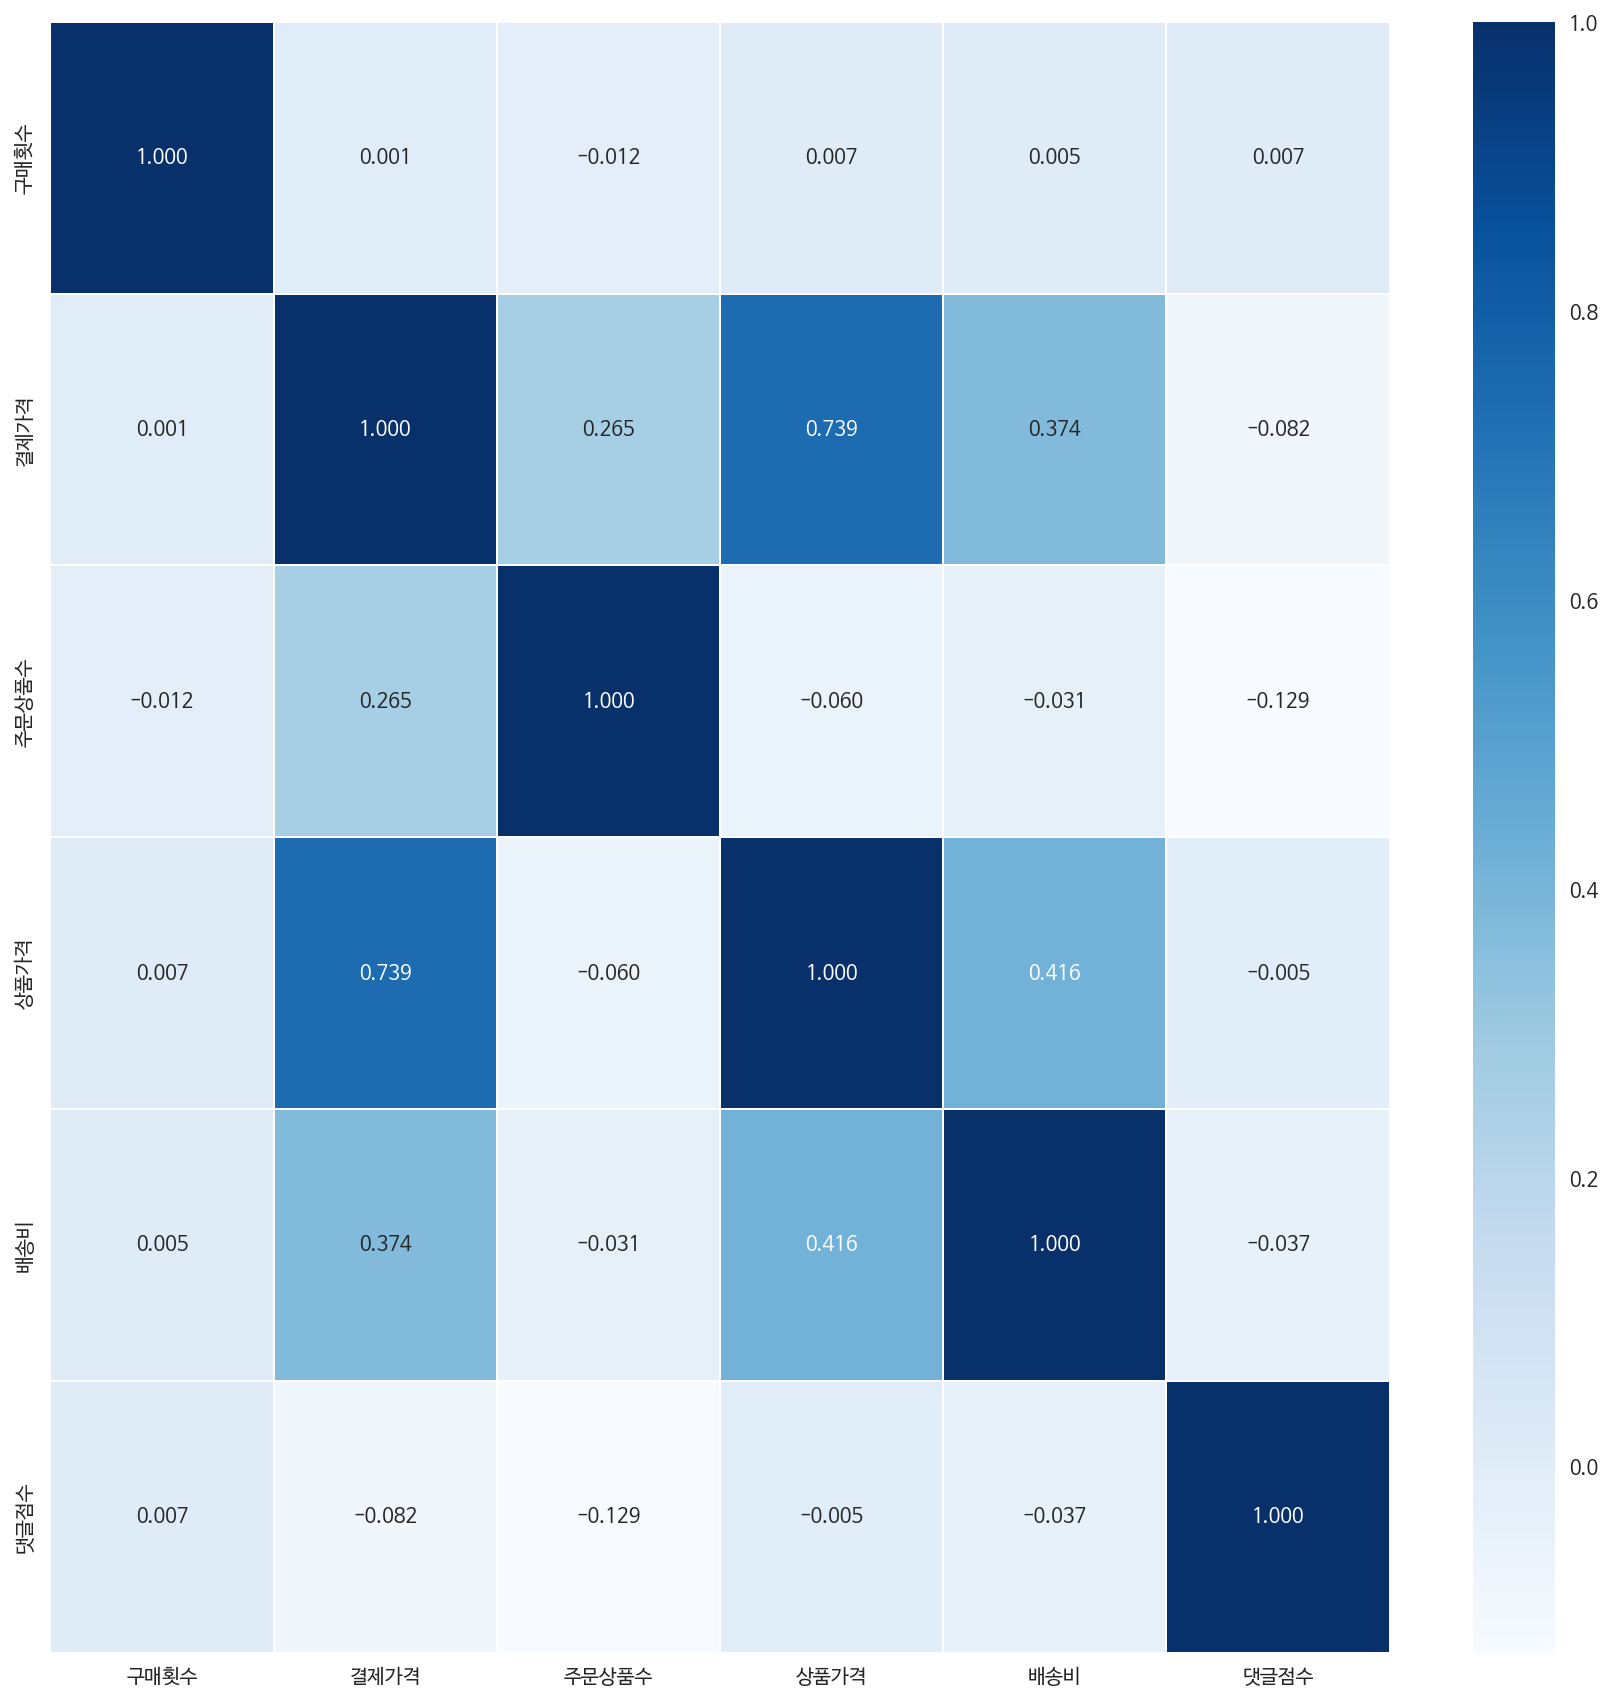

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(data =corr, annot=True,
fmt = '.3f', linewidths=.5, cmap='Blues')

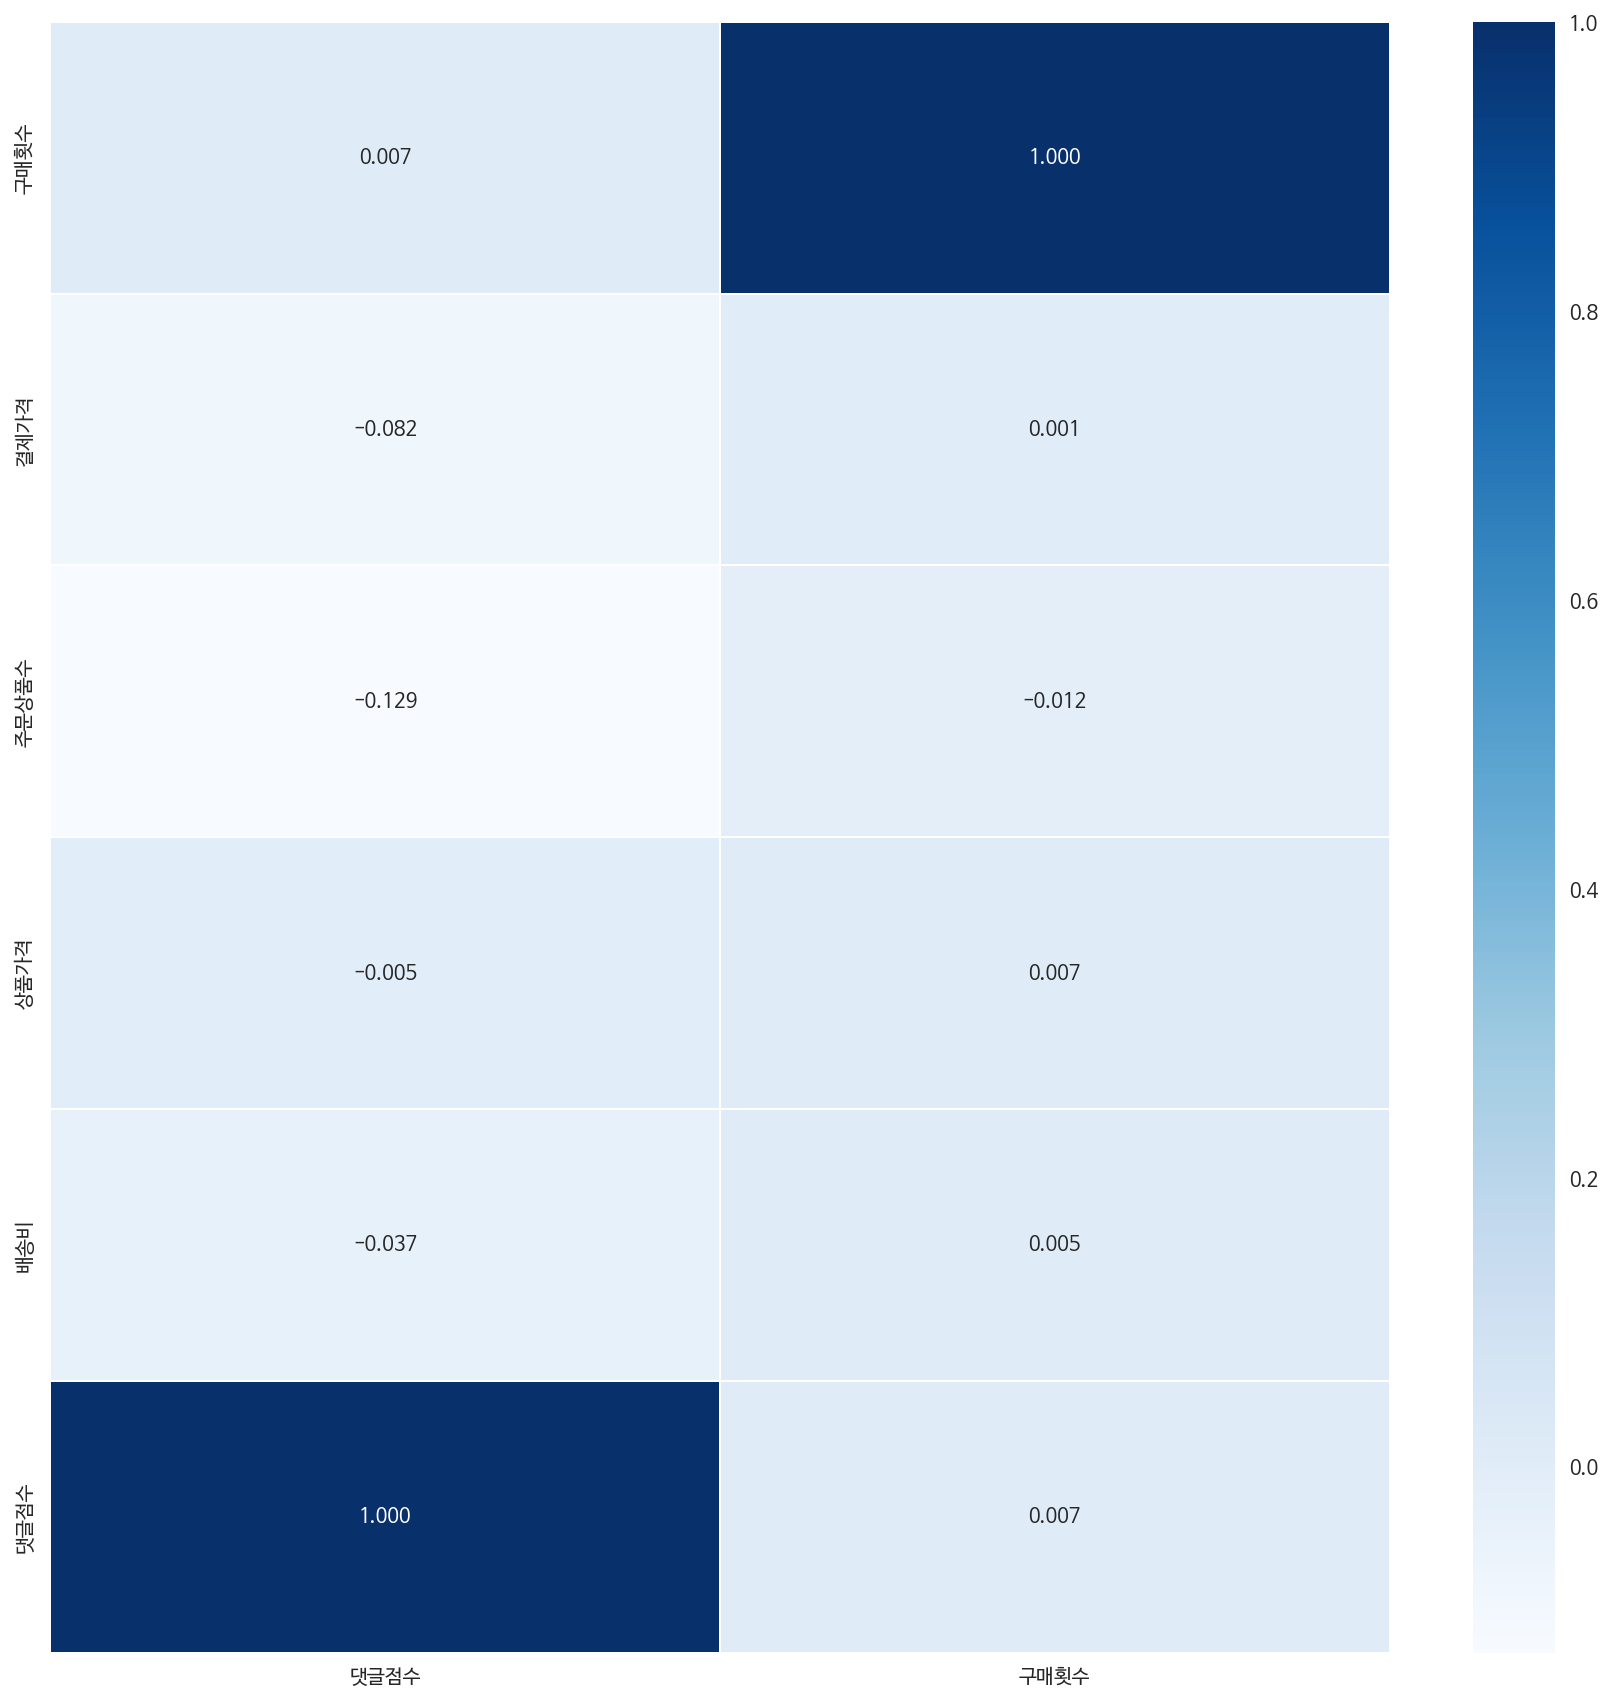

In [53]:
plt.figure(figsize=(15,15))
sns.heatmap(data =corr[["댓글점수","구매횟수"]], annot=True,
fmt = '.3f', linewidths=.5, cmap='Blues')

In [54]:
# # sns.set(style='whitegrid') # whitegrid = 배경에 하얀 선
# sns.pairplot(corr)
# plt.show()

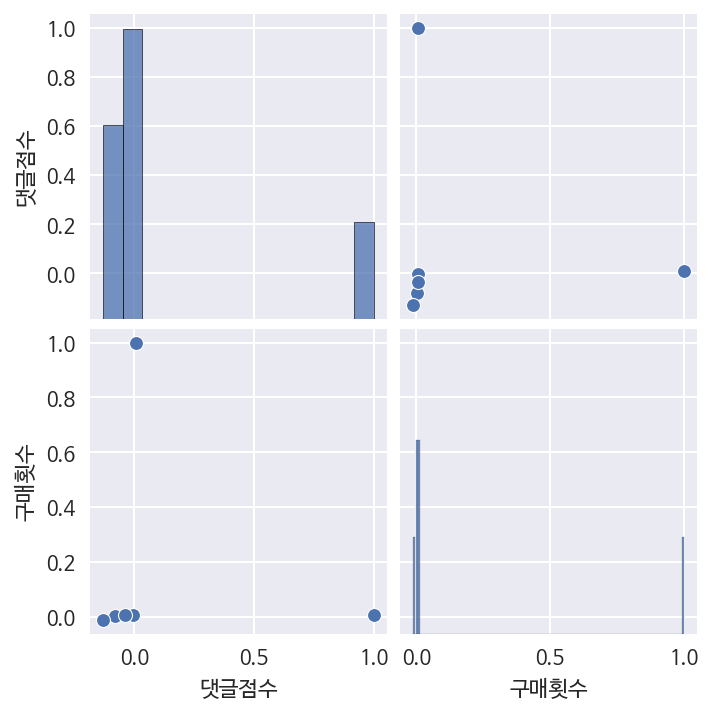

In [55]:
sns.pairplot(corr[['댓글점수', '구매횟수']])
plt.show()

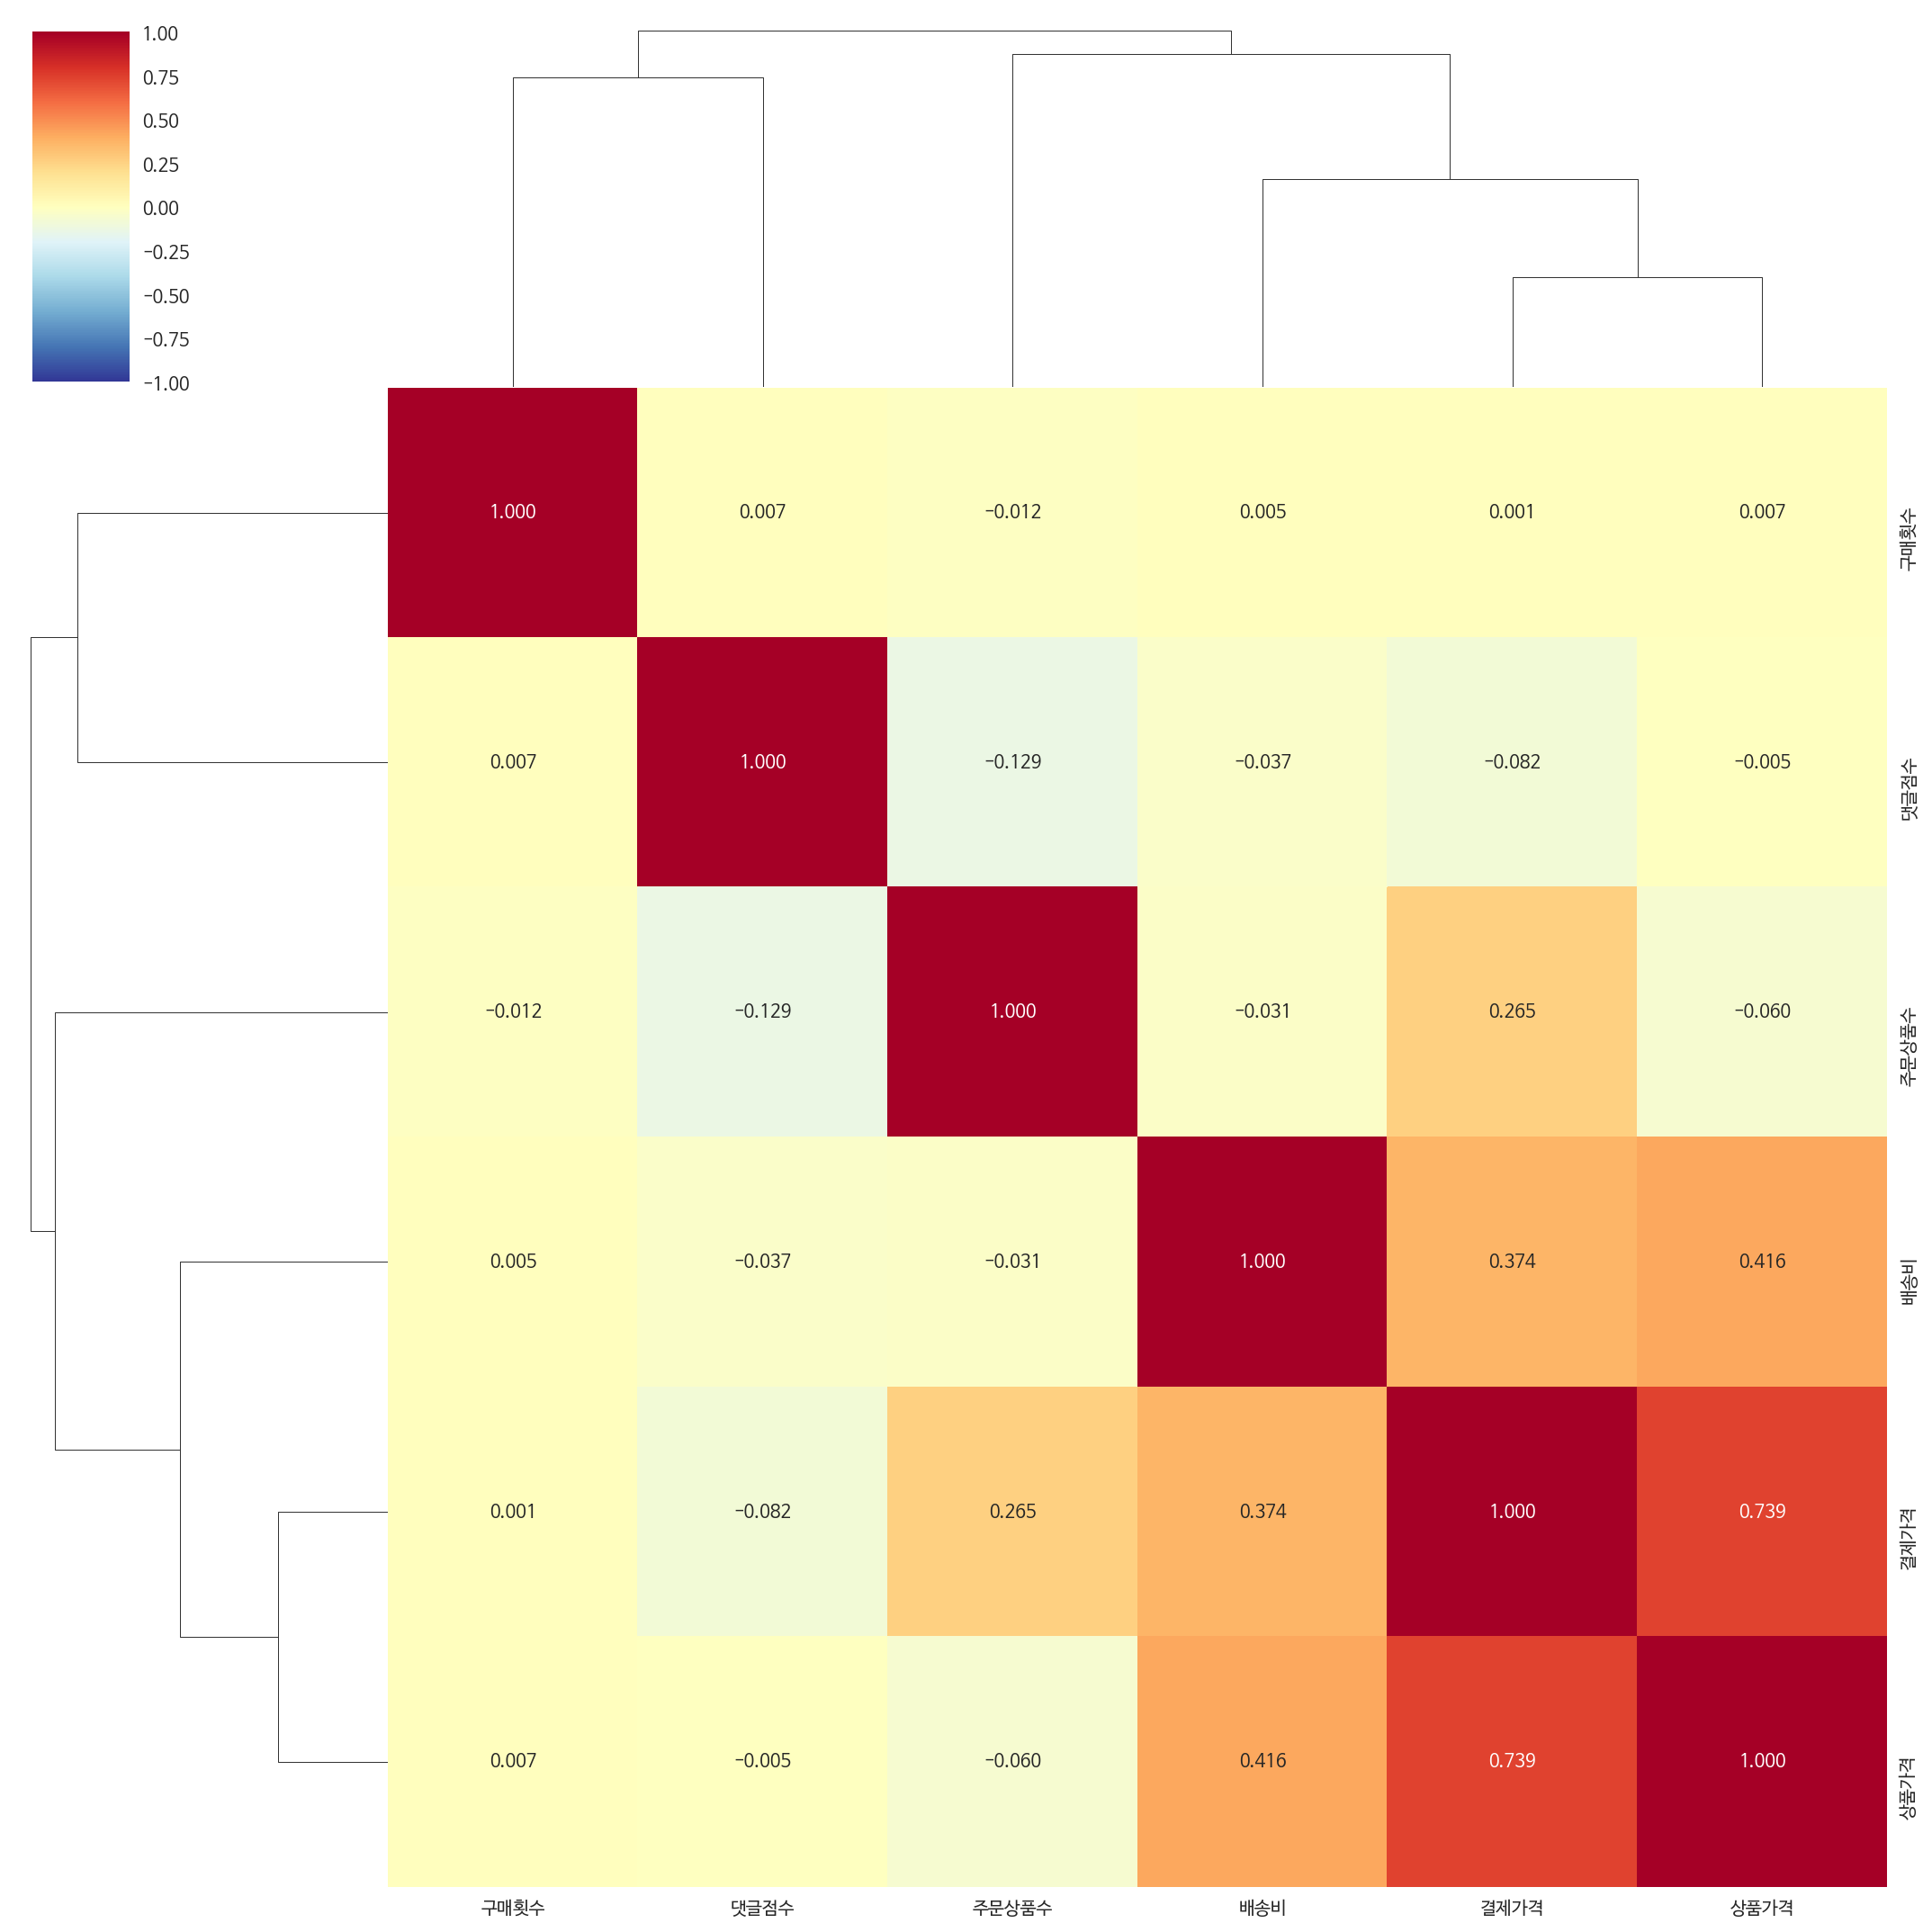

In [56]:
sns.clustermap(data =corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
               fmt = '.3f',figsize=(15,15)
              )

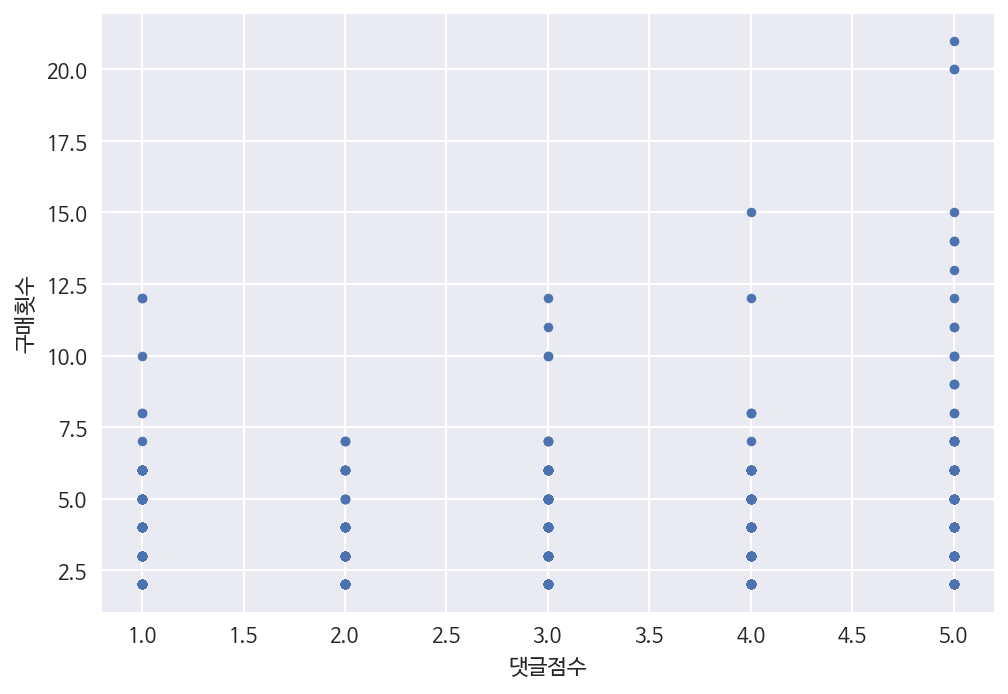

In [57]:
total.plot(kind = "scatter",x = "댓글점수",y = "구매횟수")